In [1]:
import sys
import os
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import openpolicedata as opd

In [2]:
# Query for the entire table of available data
datasets = opd.datasets_query()
datasets.head()

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
0,Arizona,Gilbert,Gilbert,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
1,Arizona,Mesa,Mesa,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
2,Arizona,State Patrol,State Patrol,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
3,Arkansas,Little Rock,Little Rock,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
4,California,Anaheim,Anaheim,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>


In [3]:
# Query for all available datasets from Maryland
df = opd.datasets_query(state="Virginia")
df

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
177,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2019,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>
178,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2020,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>
179,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2019,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>
180,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2020,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>
181,Virginia,State Patrol,State Patrol,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
182,Virginia,Virginia Community Policing Act,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name


In [4]:
# Query for all stops data containing both traffic and investigatory stops in Virginia
df = opd.datasets_query(table_type=opd.TableTypes.STOPS, state="Virginia")
df.head()

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
182,Virginia,Virginia Community Policing Act,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name


In [5]:
# To access the data, create a source using a Source Name (usually a police department name). There is an optional state input to clarify ambiguities.
# Create data source for the Virginia Community Policing Act

src = opd.Source(source_name="Virginia Community Policing Act", state="Virginia")
src.datasets

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
182,Virginia,Virginia Community Policing Act,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name


In [6]:
# Find out what years are available from the stops table

years = src.get_years(table_type="STOPS")
print(years)

[2020, 2021, 2022]


In [22]:
# Find out what jurisdictions are contained in the stops table that contain the word "Fairfax"
jurisdictions = src.get_jurisdictions(partial_name="Fairfax")
print(jurisdictions)

['Fairfax City Police', 'Fairfax County Police Department', "Fairfax County Sheriff's Office"]


In [49]:
# Load data from the source for the Fairfax County Police Department in 2021
jurisdiction = "Fairfax County Police Department"
# jurisdiction = "Charlottesville Police Department"
t = src.load_from_url(year=2021, table_type=opd.TableTypes.STOPS, jurisdiction_filter=jurisdiction)
df = t.table.copy()
len(df)

15255

In [24]:
# Show the first 5 rows of the table
df.head(n=5)

,incident_date,agency_name,jurisdiction,reason_for_stop,race,ethnicity,age,gender,action_taken,violation_type,specific_violation,person_searched,vehicle_searched,additional_arrest,virginia_crime_code,person_type,english_speaking,physical_force_by_officer,physical_force_by_subject
0,2021-01-01,Fairfax County Police Department,FAIRFAX CO,CALLS FOR SERVICE,WHITE,NON-HISPANIC,20,MALE,ARREST,COMMONWEALTH,5/1/2001,YES,NO,NO,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TERRY STOP,BLACK OR AFRICAN AMERICAN,HISPANIC,32,MALE,ARREST,COMMONWEALTH,18.2-250(A)(a),YES,NO,NO,NAR3022F5,NaN,NaN,NaN,NaN
2,2021-01-01,Fairfax County Police Department,FAIRFAX CO,CALLS FOR SERVICE,WHITE,HISPANIC,32,MALE,ARREST,LOCAL,18.2-266,YES,NO,NO,DWI5444M1,NaN,NaN,NaN,NaN
3,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,23,MALE,ARREST,COMMONWEALTH,18.2-266,YES,YES,NO,DWI5413M1,NaN,NaN,NaN,NaN
4,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TRAFFIC VIOLATION,WHITE,NON-HISPANIC,27,MALE,ARREST,LOCAL,18.2-266,YES,YES,NO,DWI5413M1,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['incident_date', 'agency_name', 'jurisdiction', 'reason_for_stop',
       'race', 'ethnicity', 'age', 'gender', 'action_taken', 'violation_type',
       'specific_violation', 'person_searched', 'vehicle_searched',
       'additional_arrest', 'person_type', 'english_speaking',
       'virginia_crime_code', 'physical_force_by_officer',
       'physical_force_by_subject', 'residency', 'race_eth'],
      dtype='object')

In [50]:
# Create a new column that combines race and ethnicity
df["race_eth"] = df["race"]
df.loc[df["ethnicity"] == "HISPANIC", "race_eth"] = "HISPANIC"
df.loc[df["ethnicity"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

df["race"].value_counts()
a = df.groupby(["race","ethnicity"]).size().unstack("ethnicity")
a = a.convert_dtypes(int)
a["Percent"] = np.round(a["UNKNOWN"]/a.sum(axis=1)*100,1)
a

,HISPANIC,NON-HISPANIC,UNKNOWN,Percent
race,,,,
AMERICAN INDIAN,<NA>,58,21,26.6
ASIAN/PACIFIC ISLANDER,2,1080,81,7.0
BLACK OR AFRICAN AMERICAN,28,2812,286,9.1
UNKNOWN,40,149,649,77.4
WHITE,3154,5987,908,9.0


In [34]:
# Walk through this more slowly
import numpy as np
searches = df.groupby(["person_searched","race_eth"]).size().unstack("race_eth")
number_of_stops = searches.sum()
number_of_searches = searches.loc["YES"]
percent_stops_with_search = np.round(number_of_searches/number_of_stops*100,1)
searches = pd.DataFrame([number_of_stops, number_of_searches, percent_stops_with_search], 
    index=["# of Stops", "# of Searches", "% of Stops With Search"])
searches = searches.transpose()
searches["# of Stops"] = searches["# of Stops"].astype(int)
searches["# of Searches"] = searches["# of Searches"].astype(int)
# # searches.dropna(inplace=True)
searches

,# of Stops,# of Searches,% of Stops With Search
race_eth,,,
AMERICAN INDIAN,58,1,1.7
ASIAN/PACIFIC ISLANDER,1080,49,4.5
BLACK OR AFRICAN AMERICAN,2812,320,11.4
HISPANIC,3224,456,14.1
UNKNOWN,2094,5,0.2
WHITE,5987,297,5.0


Text(0.5, 1.0, 'Percentage of Stops Where the Person is Searched')

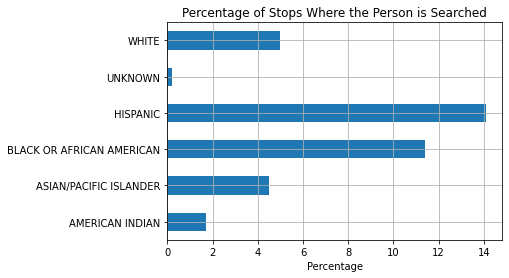

In [36]:
ax = searches.plot.barh(y="% of Stops With Search", grid=True, legend=False)
ax.set_ylabel("")
ax.set_xlabel("Percentage")
ax.set_title("Percentage of Stops Where the Person is Searched")